In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

**9. Consider the USArrests data. We will now perform hierarchical clus-
tering on the states.
(a) Using hierarchical clustering with complete linkage and
Euclidean distance, cluster the states.**

In [2]:
USArrests = pd.read_csv('Data/USArrests.csv', na_values='?').dropna().set_index('State')

In [3]:
from scipy.cluster import hierarchy
hc_complete = hierarchy.complete(USArrests)

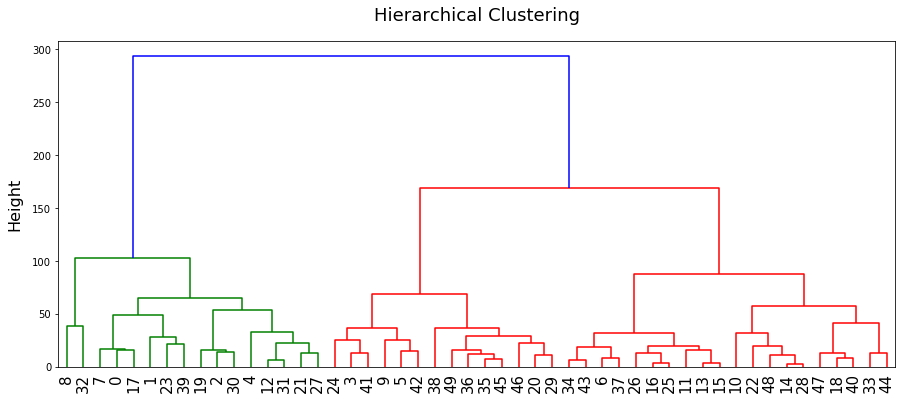

In [4]:
plt.figure(figsize=(15, 6))
plt.title("Hierarchical Clustering", size=18,pad = 20)
plt.ylabel('Height',fontsize = 16,labelpad=10)
hierarchy.dendrogram(hierarchy.complete(USArrests), leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

**(b) Cut the dendrogram at a height that results in three distinct
clusters. Which states belong to which clusters?**

In [5]:
hierarchy.cut_tree(hc_complete,3).T

array([[0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
        2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2,
        2, 1, 1, 2, 2, 1]])

In [6]:
pd_cut3 = pd.DataFrame(hierarchy.cut_tree(hc_complete,3),index = USArrests.index)
pd_cut3.columns = ['unscale']
pd_cut3.T

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
unscale,0,0,0,1,0,1,2,0,0,1,...,2,1,1,2,2,1,1,2,2,1


**(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.**

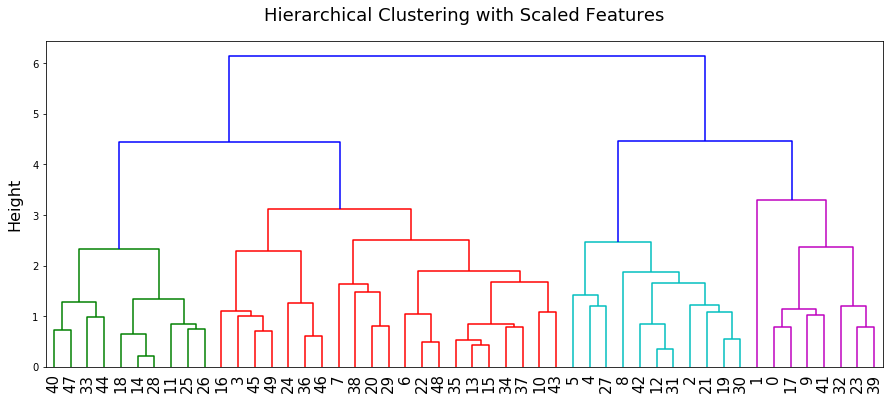

In [7]:
from sklearn.preprocessing import scale
XSC = scale(USArrests,axis = 0)
hc_complete_scaled = hierarchy.complete(XSC)
plt.figure(figsize=(15, 6))
plt.title("Hierarchical Clustering with Scaled Features", size=18,pad = 20)
plt.ylabel('Height',fontsize = 16,labelpad=10)
hierarchy.dendrogram(hierarchy.complete(XSC), leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [8]:
pd_cut3['scaled'] = hierarchy.cut_tree(hc_complete_scaled,3)
pd_cut3.T

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
unscale,0,0,0,1,0,1,2,0,0,1,...,2,1,1,2,2,1,1,2,2,1
scaled,0,0,1,2,1,1,2,2,1,0,...,2,0,1,2,2,2,2,2,2,2


**(d) What effect does scaling the variables have on the hierarchical
clustering obtained? In your opinion, should the variables be
scaled before the inter-observation dissimilarities are computed?
Provide a justification for your answer.**

In [9]:
pd.crosstab(pd_cut3.scaled,pd_cut3.unscale)

unscale,0,1,2
scaled,,,
0,6,2,0
1,9,2,0
2,1,10,20


In [10]:
USArrests['scaled'] = pd_cut3['scaled']
USArrests['unscale'] = pd_cut3['unscale']

In [11]:
USArrests

,Murder,Assault,UrbanPop,Rape,scaled,unscale
State,,,,,,
Alabama,13.2,236,58,21.2,0,0
Alaska,10.0,263,48,44.5,0,0
Arizona,8.1,294,80,31.0,1,0
Arkansas,8.8,190,50,19.5,2,1
California,9.0,276,91,40.6,1,0
Colorado,7.9,204,78,38.7,1,1
Connecticut,3.3,110,77,11.1,2,2
Delaware,5.9,238,72,15.8,2,0
Florida,15.4,335,80,31.9,1,0


**从各个州的结果来看，因为'Assault'的标量值较大，未标准化前，state的分类基本都是以Assault大小为基准，造成了分类的单一特性化，为了考虑多种特性的影响，建议对所有变量标准化。**